 ## <center>Data Wrangling PDF Files - Stacey Sandy</center>


For this week, we will be retrieving the data from a PDF, much like we did in Use Case 1 in the <i>From The Experts</i> (FTE) for this week. (located in the assign3_data folder on WorldClass). You will find three PDFs inside this folder:
* CustomerSurvey_blank.pdf - blank copy of a Customer Satification Survey
* CustomerSurvey_completed.pdf - 50 completed surveys 
* CustomeSurvey_large.pdf - 200 completed surveys (for the Bonus Option)


### Assignment Requirements:
You will need to retreive the customer inputs from one of the two PDFs containing completed surveys and write the data into a CSV.  <br>
Please keep the following requirements in mind as you work through this assignment:

1. Functions are your friends!  
2. You may not use a dataframe within this assignment.  Think lists and dictionaries.
3. Your CSV header row should match:
   * id|Q1|Q2|Q3|Q4|Q5|Q6|Q7|Q8|Q9|Q10|Q11|Q12
4. CSV field definition:
   * id - unique index for each survey (numeric)
   * Q1 - numeric value matching customer input
   * Q2 - string matching customer input
   * Q3 - string matching customer input
   * Q4 - list of strings, seperated by ':' matching all of the customer inputs for this question
   * Q5 - numeric value matching customer input
   * Q6 - numeric value matching customer input
   * Q7 - numeric value matching customer input
   * Q8 - string matching customer input
   * Q9 - string matching customer input
   * Q10 - string matching customer input
   * Q11 - string matching customer input
   * Q12 - string matching customer input
5. Within CustomerSurvey_completed.pdf, you can assume the only Q4 has multiple responses and all questions have a response.
6. If you decide to challenge yourself work with CustomeSurvey_large.pdf, you can not safely assume that all questions have a response and that only Q4 has multiple. This means that you will need to have some error handling in place. 
7. You must keep the first page and the second page for the same survey together. No mixing results across the surveys.

#### You might be asking yourself "Why would I decide to work with the more challenging file?"  The answer is simple...  It's worth more points...  50% more points in fact.   So, you can earn up to 15 out of 10 points for taking this option.  
If you decide to take this option, there are a complete of items I would like to see you note in your code.
1. Your very first cell, very first line should read "Bonus Option Selected") - make this big, so I see it!
2. Some where in your notebook, you need to output when your code detects a "special scenario" and display how you are handling this.
3. If the customer has selected multiple values for Q1,Q2,Q4-Q12, then you need to reduce their input to only one choice. You get to decide if you take the higher of two values or the lower.  just be consistent across the board, with the following special conditions:
   * If the input is lower than the possible values, than use the lowest value.  See the example below about inventing a value.   In this case you would return a 1 and not the -1.
   * Same goes for a value that is higher than the highest possible value.  Here' you'd return the highest value.

4. If the customer doesn't answer a question, than return a 'nan' for that input.


Possible Special Scenarios:: 
* Not answering a question
* Selecting multiple values for Q2,Q4,Q8-Q11
* Customer invents a value for Q1,Q5-Q7<br>
<img align="left" style="padding-right:10px;" src="assign3_data/invent_value.png" ><br>

<div class="alert alert-block alert-info">
<b>Helpful Hint::</b> Start small!  Work with only one completed survey while developing your code and then increase the total number of PDFs as you go. (Splitting the file I give you might be useful)
</div>

<div class="alert alert-block alert-danger">
<b>Important::</b> Running all PDFs through your code will be a time consuming process. 
I highly recommend you have some way of telling if your process is progressing or stuck somewhere.
</div>

### What to turn in:
Please submit your well organized and documented Jupyter notebook and your CSV output file.

<span style ="color:blue">===============================================================================================</span>

<b>My Assignment deliverables begin here:</b>

## <span style ="color:red"> "Bonus Option Selected"</span>

First let's import all the necessary modules and libraries for this assignment.<br>
We will also create a file object and open the "large" Customer Survey PDF file.<br>

In [1]:
#import PyPDF2 
from PyPDF2 import PdfFileReader, PdfFileWriter,PdfFileMerger

# create a file object for our PDF
pdfFileObj = open('assign3_data/CustomerSurvey_large.pdf', 'rb') 

# create an object to access the PDF
pdfReader = PdfFileReader(pdfFileObj) 

In [2]:
#Check the number of pages. (Remember it should be 400 pages.)
print(pdfReader.numPages) 

400


Let's take a look at what kind of information we can learn about the LARGE Customer Survey PDF file. 

In [3]:
# Here we extract some MetaData off the CustomerSurvey_large.pdf File.

from PyPDF2 import PdfFileReader

def extract_information(pdf_path):
    with open(pdf_path, 'rb') as f:
        pdf = PdfFileReader(f)
        information = pdf.getDocumentInfo()
        number_of_pages = pdf.getNumPages()

    txt = f"""
    Information about {pdf_path}: 

    Author: {information.author}
    Creator: {information.creator}
    Producer: {information.producer}
    Subject: {information.subject}
    Title: {information.title}
    Number of pages: {number_of_pages}
    """

    print(txt)
    return information

if __name__ == '__main__':
    path = 'assign3_data/CustomerSurvey_large.pdf'
    extract_information(path)


    Information about assign3_data/CustomerSurvey_large.pdf: 

    Author: None
    Creator: None
    Producer: PyPDF2
    Subject: None
    Title: None
    Number of pages: 400
    


Because we have two PDF files:<br>
*CustomerSurvey_completed.pdf - 50 completed surveys <br>
*CustomeSurvey_large.pdf - 200 completed surveys (for the Bonus Option)<br>
<br>
We will need to conduct a test on a single survey first.

Instead of reading a single page, let's read the first two pages which should consist <i>only</i> the first completed Customer Survey.<br>
From here,we will split the first completed customer survery (page 1 & 2) and write it as its own new PDF file: <b>completed_survey1</b>. This will be used to refine our code before applying it to the 400 page CustomerSurvey_large.pdf file. <br>

In [4]:
#Remember, we already read in the large file above using the file object pdfFileObj.

#Here we will write in the first two pages (page 0-1) in the large completed survey PDF file.
pdfWriter = PdfFileWriter()
pdfWriter.addPage(pdfReader.getPage(0)) #Get page 1 from large PDF file.
pdfWriter.addPage(pdfReader.getPage(1)) #Get page 2 from large PDF file.

#Create a new PDF for the first completed survey:
with open('assign3_data/customer_survey_completed1.pdf', 'wb') as out:
    pdfWriter.write(out)

Now, go check the new PDF file: completed_survey1.pdf file in the file path above and confirm both pages outputed.

In [6]:
#Here we can see it in the directory path:
!dir /S customer_survey*

 Volume in drive C is Windows
 Volume Serial Number is 34A7-90A0

 Directory of C:\Users\Stacey\Desktop\RU\MSDE621\WeeklyContent\assign3_data

11/22/2019  12:49 PM           779,030 customer_survey_completed1.pdf
               1 File(s)        779,030 bytes

     Total Files Listed:
               1 File(s)        779,030 bytes
               0 Dir(s)  13,737,377,792 bytes free


<b>Convert: PDF to JPEG</b>
The first step is to convert the blank PDF (ConsumerSurvey_blank) into a JPEG image.<br>


In [7]:
# import Wand and Image as Img. 
from wand.image import Image as Img

# variables are so much eaiser to work with
infile = 'CustomerSurvey_blank.pdf'
outfile = 'customer_survey_blank.jpg'

base_dir = 'assign3_data/' 

blank_infile = base_dir + infile    
blank_outfile = base_dir + outfile 

# actually convert the PDF into a JPEG
with Img(filename = blank_infile, resolution=300) as img:
    img.compression_quality = 99
    img.save(filename = blank_outfile)

In [8]:
#Verify that the jpeg image was created.
!dir /S customer_survey*

 Volume in drive C is Windows
 Volume Serial Number is 34A7-90A0

 Directory of C:\Users\Stacey\Desktop\RU\MSDE621\WeeklyContent\assign3_data

11/22/2019  12:50 PM           523,789 customer_survey_blank-0.jpg
11/22/2019  12:50 PM           676,784 customer_survey_blank-1.jpg
11/22/2019  12:49 PM           779,030 customer_survey_completed1.pdf
               3 File(s)      1,979,603 bytes

     Total Files Listed:
               3 File(s)      1,979,603 bytes
               0 Dir(s)  13,739,511,808 bytes free


As we learned in the FTE, 2 images (JPEGs) were created of the first page and the second page from the blank customer survey PDF file. Let's confirm this. (Also notice that the customer_survey_completed1, was also created.)

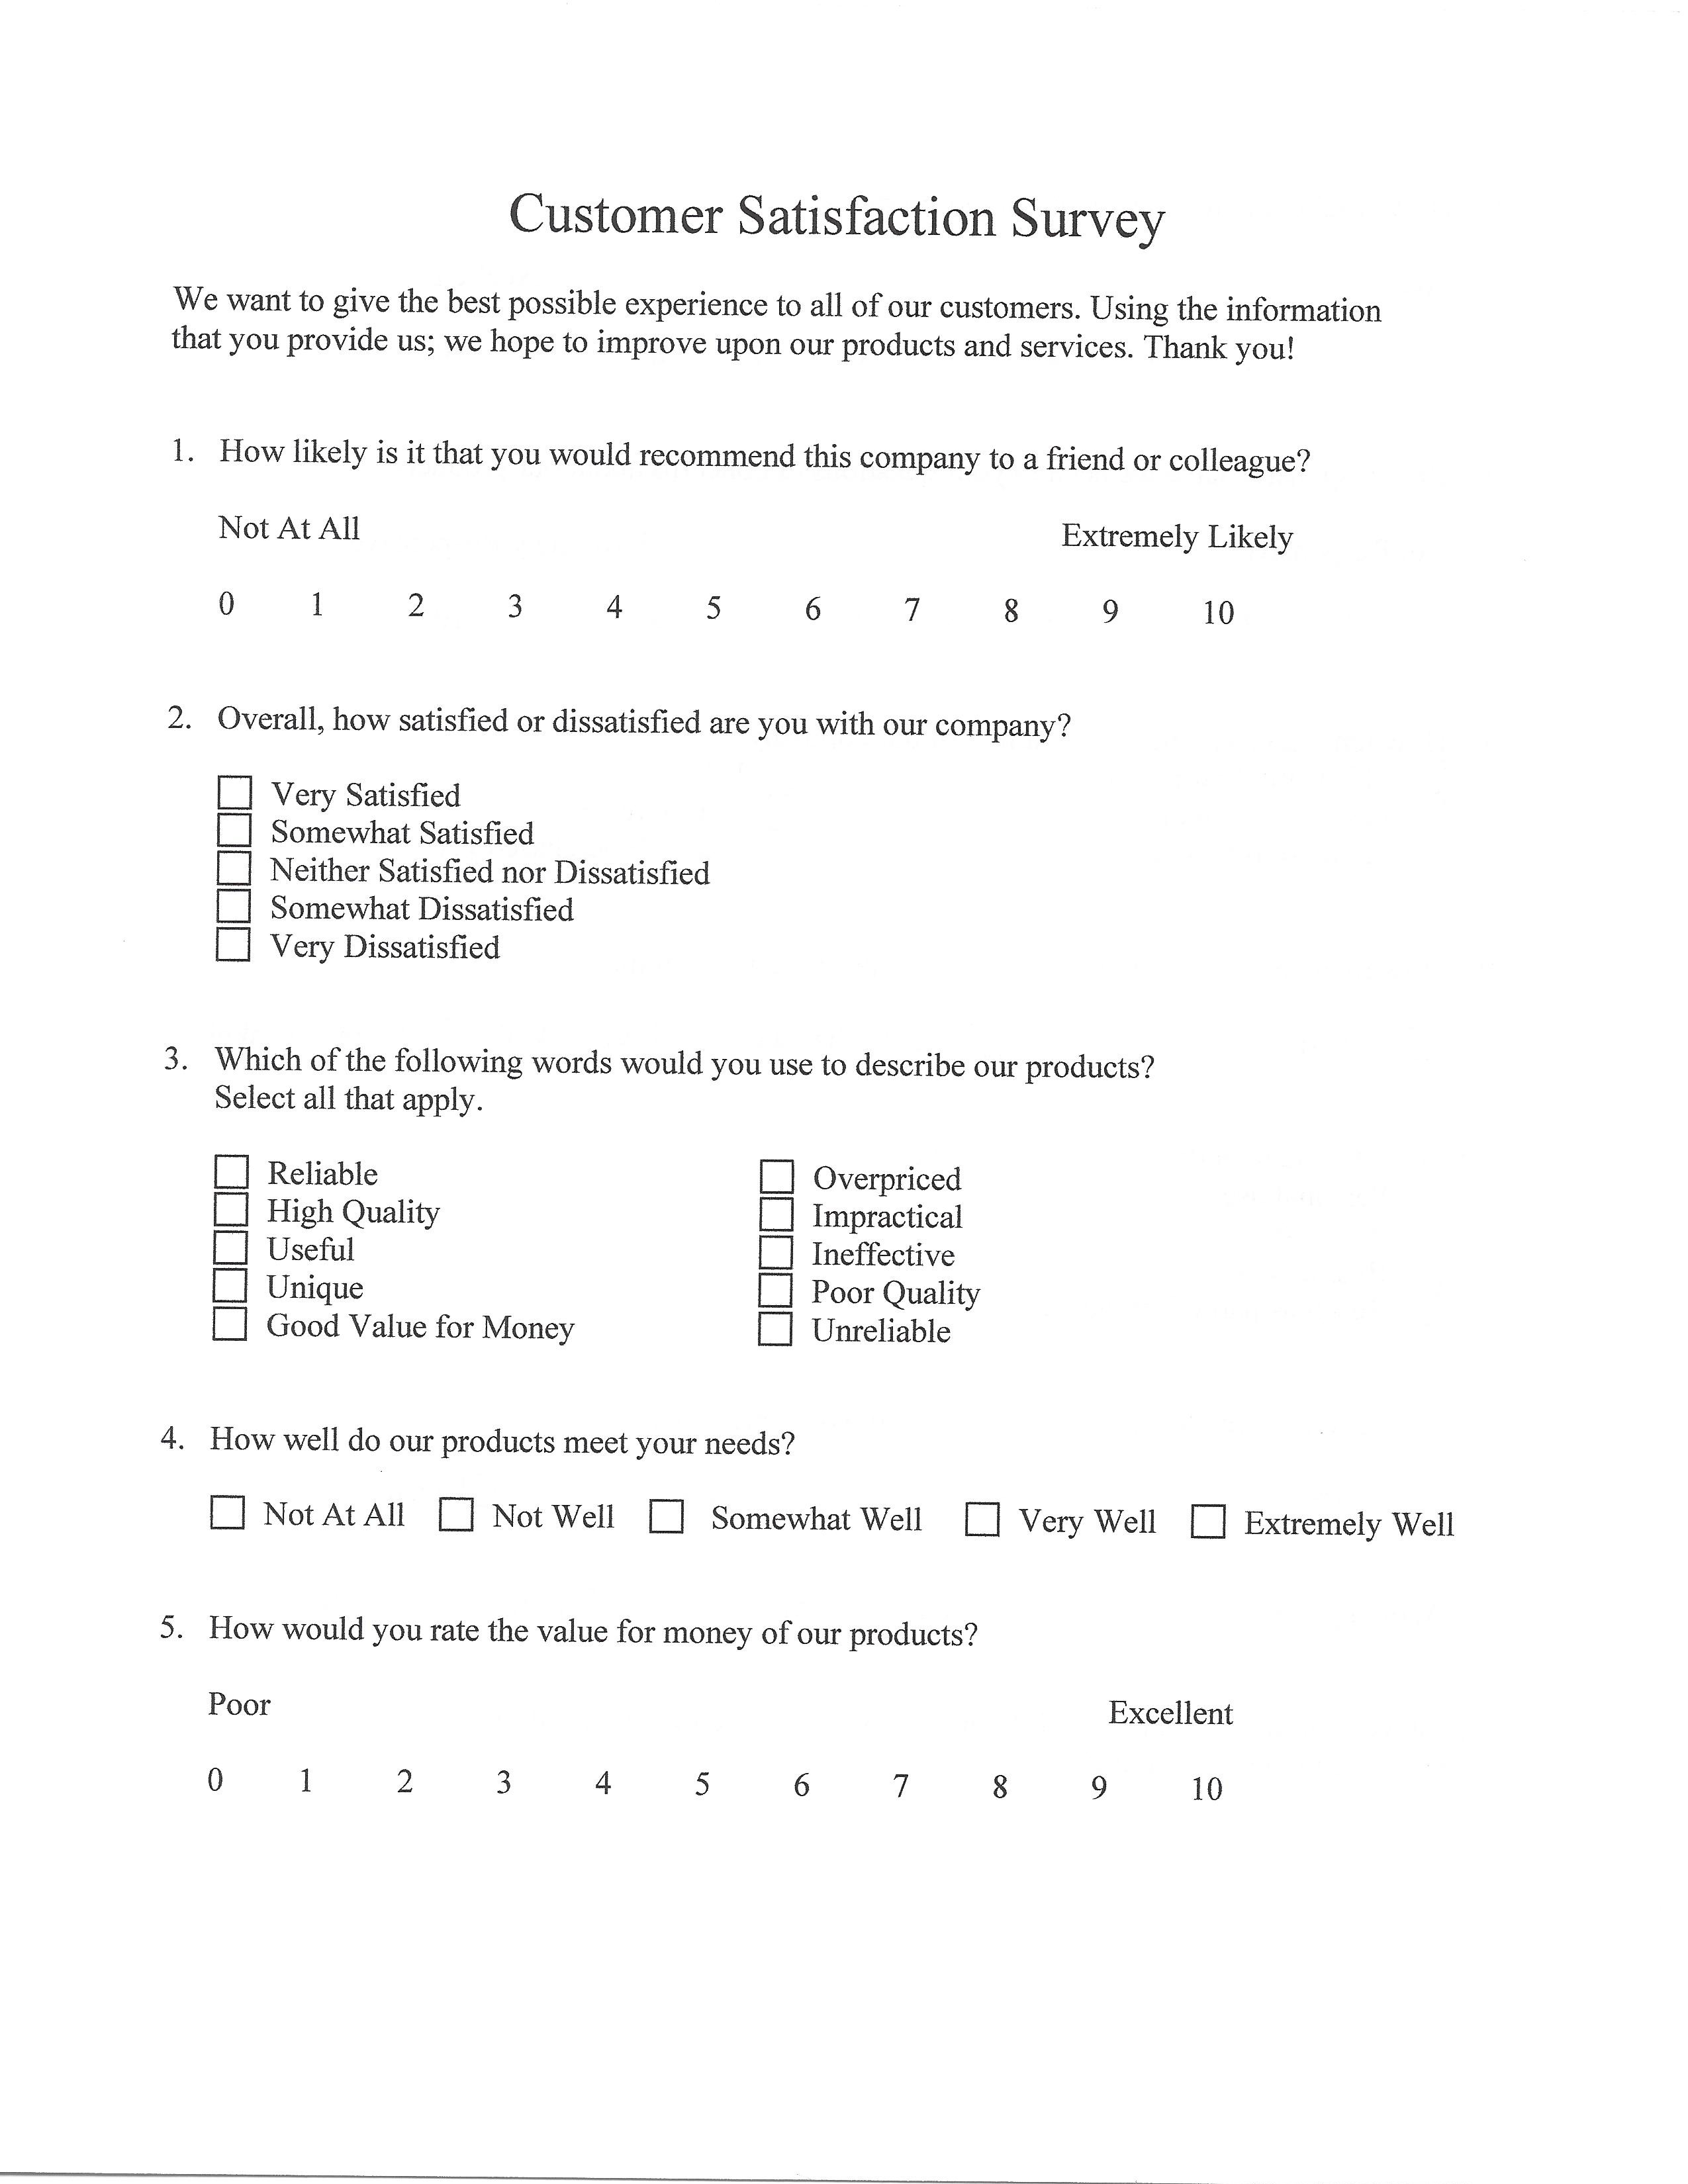

In [9]:
#look at the first BLANK customer survey file with the 0 postfix first
from IPython.display import Image

blank_image1 = base_dir + 'customer_survey_blank-0.jpg'

Image(filename=blank_image1)

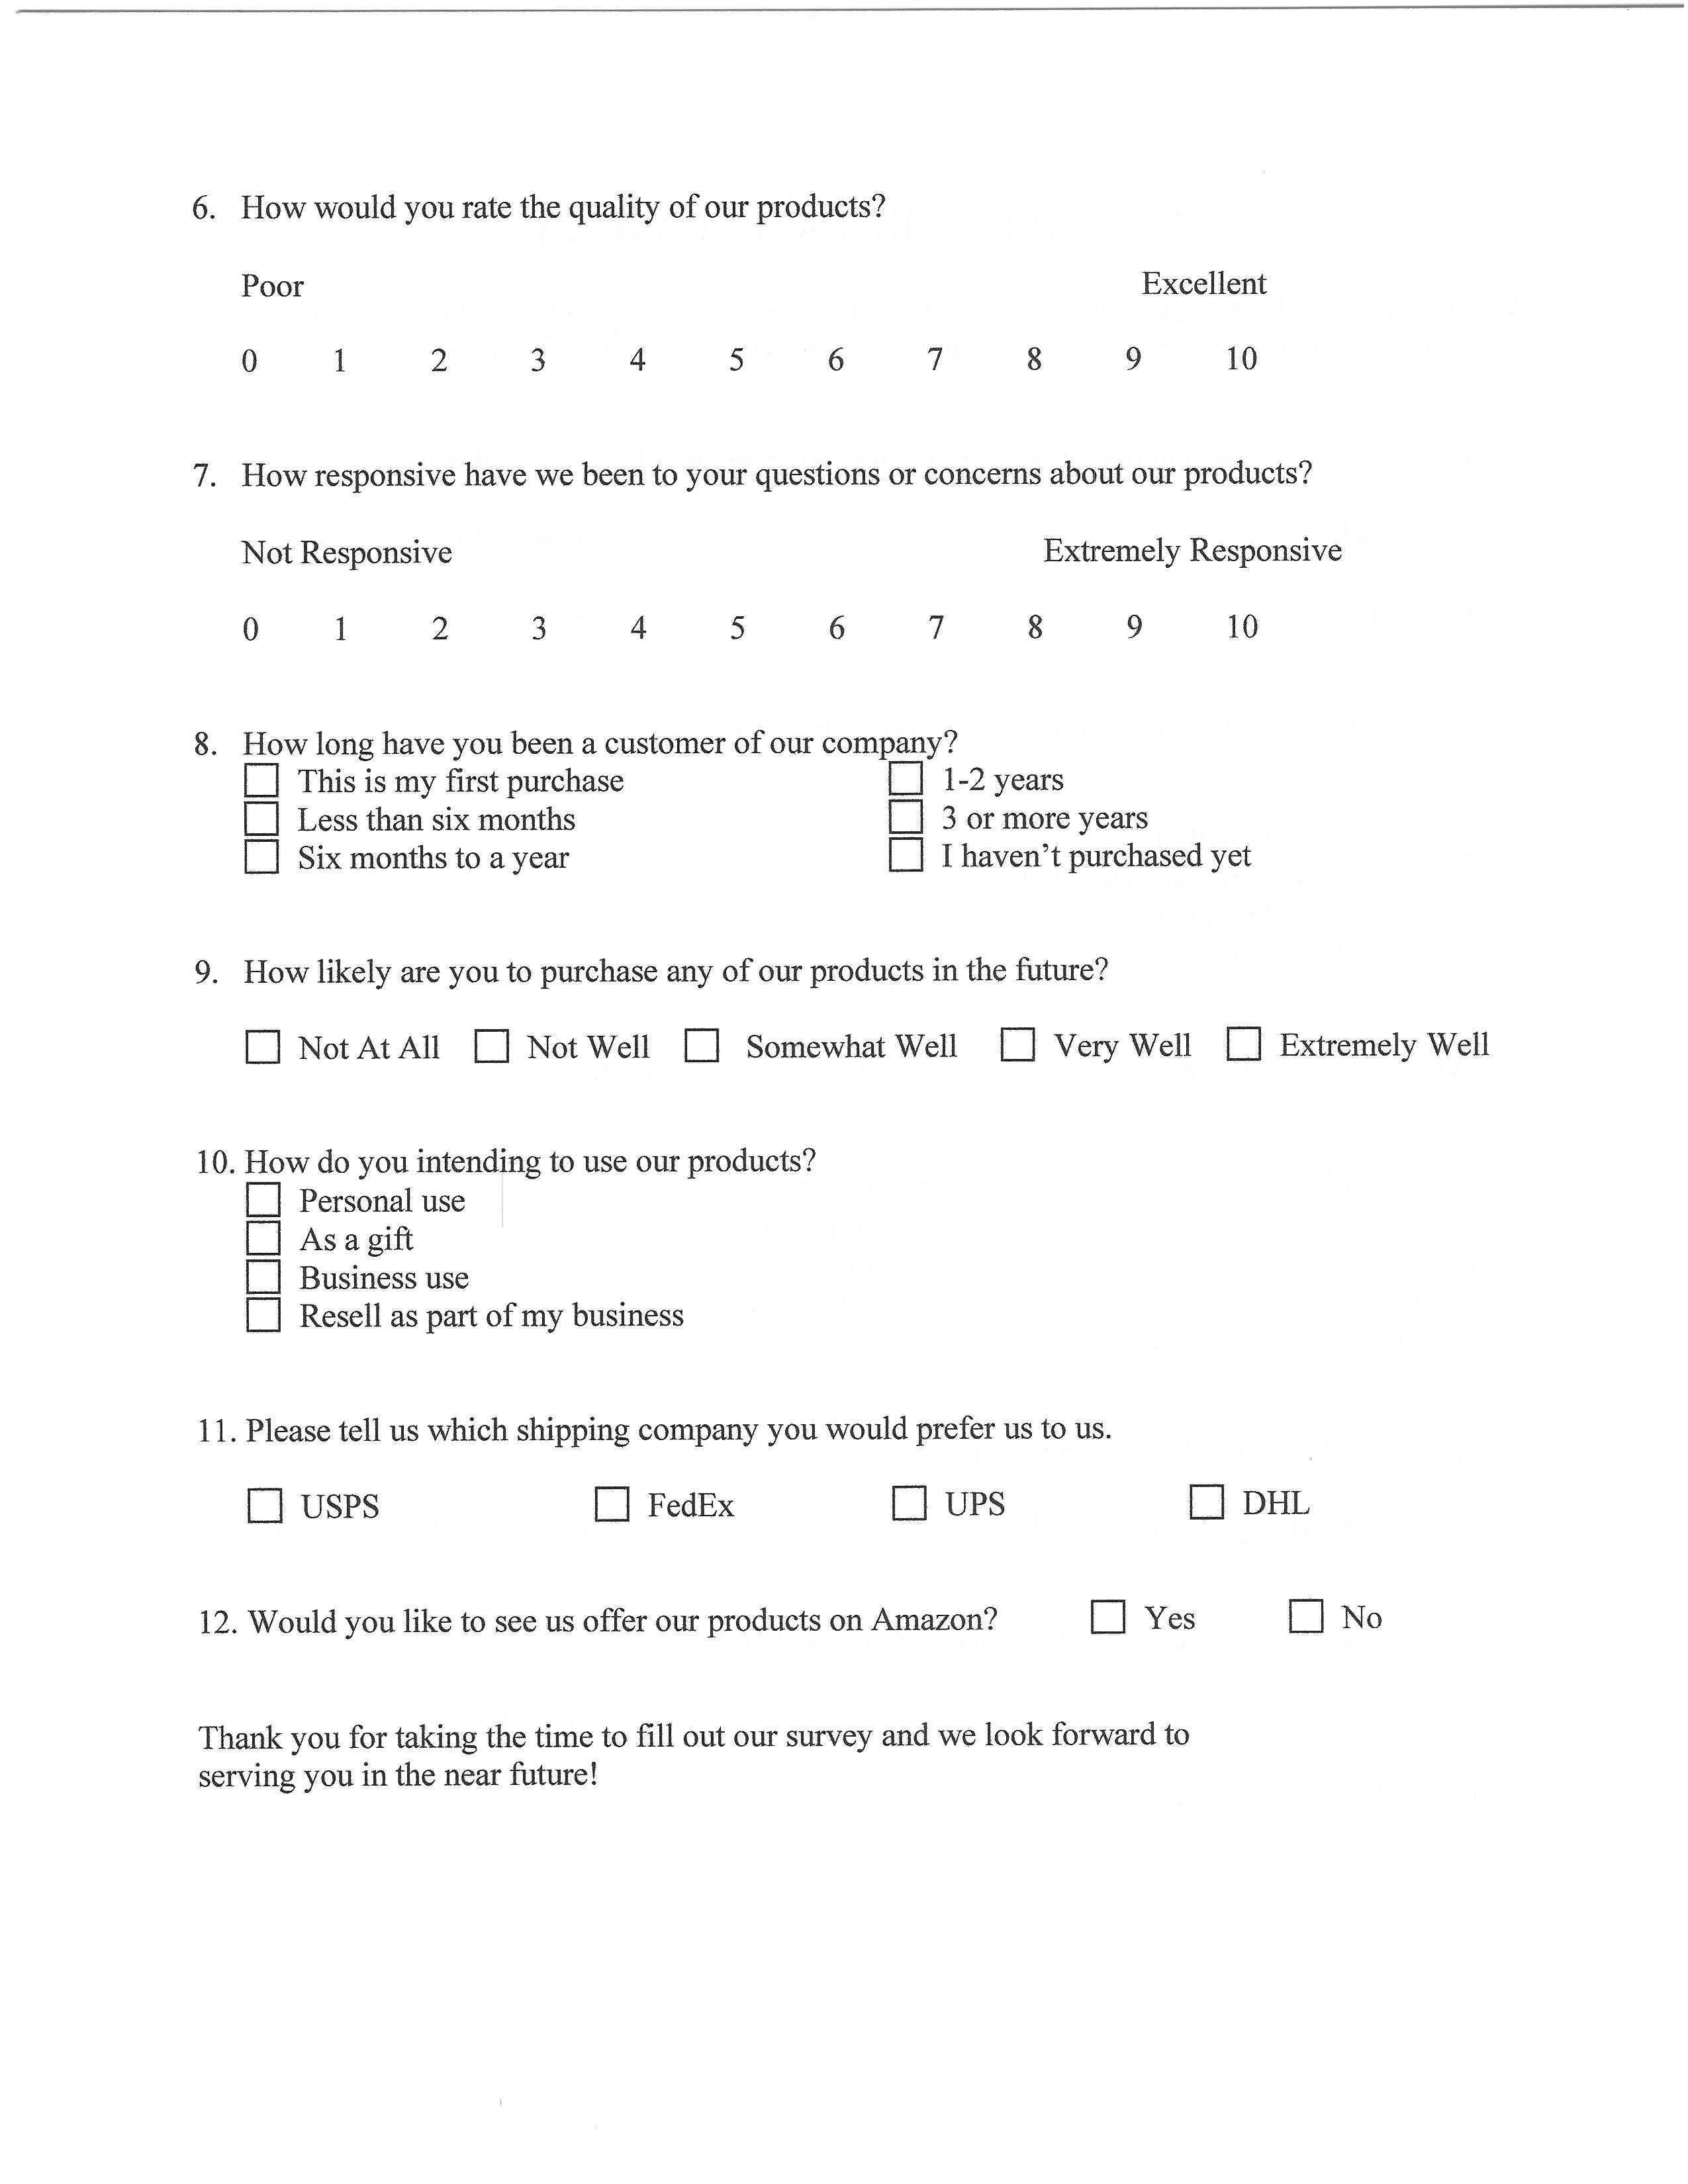

In [10]:
#and now for at the second BLANK customer survey file:
from IPython.display import Image

blank_image2 = base_dir + 'customer_survey_blank-1.jpg'

Image(filename=blank_image2)

Yay. We have gotten a separate JPEG image for each BLANK Customer Survey page in the <b>large</b> PDF. This is CONFIRMED in the above output!

<b>Extracting Text with pytesseract</b><br>
Let's see if we can read the text off the BLANK Customer survey images. We will use Python's pytesseract package, which we already installed, (https://pypi.org/project/pytesseract/) to read the text out of the JPEG image.

In [11]:
# more imports
from PIL import Image
import pytesseract

# read and store the image
blank_text = pytesseract.image_to_string(Image.open(blank_image1))

# let's see what we have
blank_text

'Customer Satisfaction Survey\n\nWe want to give the best possible experience to all of our customers. Using the information\nthat you provide us; we hope to improve upon our products and services. Thank you!\n\n1. How likely is it that you would recommend this company to a friend or colleague?\nNot At All Extremely Likely\n\n0 1 2 3 4 5 6 7 8 9 10\n\n2. Overall, how satisfied or dissatisfied are you with our company?\n\n[-] Very Satisfied\n\n[_] Somewhat Satisfied\n\n[_] Neither Satisfied nor Dissatisfied\n[-] Somewhat Dissatisfied\n\n[_] Very Dissatisfied\n\n3. Which of the following words would you use to describe our products?\nSelect all that apply.\n\n[| Reliable [_] Overpriced\n[_] High Quality [_] Impractical\n["] Useful [] Ineffective\n[ ] Unique [-] Poor Quality\n[_] Good Value for Money [-] Unreliable\n\n4. How well do our products meet your needs?\n\n[-] Not At All [-] Not Well [-] Somewhat Well [ ] Very Well [_] Extremely Well\n\n5. How would you rate the value for money o

<b>Okay, let's go back to take a look at the newly created PDF file of the first COMPLETED Customer Survey that we split off from the large PDF file....</b>

#### Working with a Completed Survey

Time to see what pytesseract can do with a COMPLETED customer survey. You repeat all the steps up to this point with a <b><u>completed survey</b></u> rather than the <b>blank survey</b>. 

In [12]:
# import stuff
from wand.image import Image as Img

infile2 = 'customer_survey_completed1.pdf'
outfile2 = 'customer_survey_completed1.jpg'

base_dir = 'assign3_data/' 

filled_infile = base_dir + infile2
filled_outfile = base_dir + outfile2


with Img(filename=filled_infile, resolution=300) as img:
    img.compression_quality = 99
    img.save(filename=filled_outfile)

In [13]:
# verify that the PDFs and JPEGs where created
!dir /S customer*

 Volume in drive C is Windows
 Volume Serial Number is 34A7-90A0

 Directory of C:\Users\Stacey\Desktop\RU\MSDE621\WeeklyContent\assign3_data

11/14/2019  01:38 PM           752,825 CustomerSurvey_blank.pdf
11/14/2019  01:38 PM        38,833,461 CustomerSurvey_completed.pdf
11/14/2019  01:38 PM       155,710,274 CustomerSurvey_large.pdf
11/22/2019  12:50 PM           523,789 customer_survey_blank-0.jpg
11/22/2019  12:50 PM           676,784 customer_survey_blank-1.jpg
11/22/2019  12:51 PM           552,629 customer_survey_completed1-0.jpg
11/22/2019  12:51 PM           743,833 customer_survey_completed1-1.jpg
11/22/2019  12:49 PM           779,030 customer_survey_completed1.pdf
               8 File(s)    198,572,625 bytes

     Total Files Listed:
               8 File(s)    198,572,625 bytes
               0 Dir(s)  13,736,669,184 bytes free


We are certainly building upon the customer_survey files above!<br>
<br>
We started with:<br>
* CustomerSurvey_blank.pdf - blank copy of a Customer Satification Survey
* CustomerSurvey_completed.pdf - 50 completed surveys 
* CustomeSurvey_large.pdf - 200 completed surveys (for the Bonus Option)
<br>
<br>Now we have added:<br>
* customer_survey_blank-0.jpg - JPEG BLANK copy of a Customer Satification Survey (page 1)
* customer_survey_blank-1.jpg - JPEG BLANK copy of a Customer Satification Survey (page 2)
* customer_survey_completed1-0.jpg - JPEG COMPLETED copy of Customer Satification Survey (page 1)
* customer_survey_completed1-1.jpg - JPEG COMPLETED copy of Customer Satification Survey (page 2)
* customer_survey_completed1.pdf - First COMPLETED copy of Customer Satisfaction Survey (page 1 &2) of large PDF file

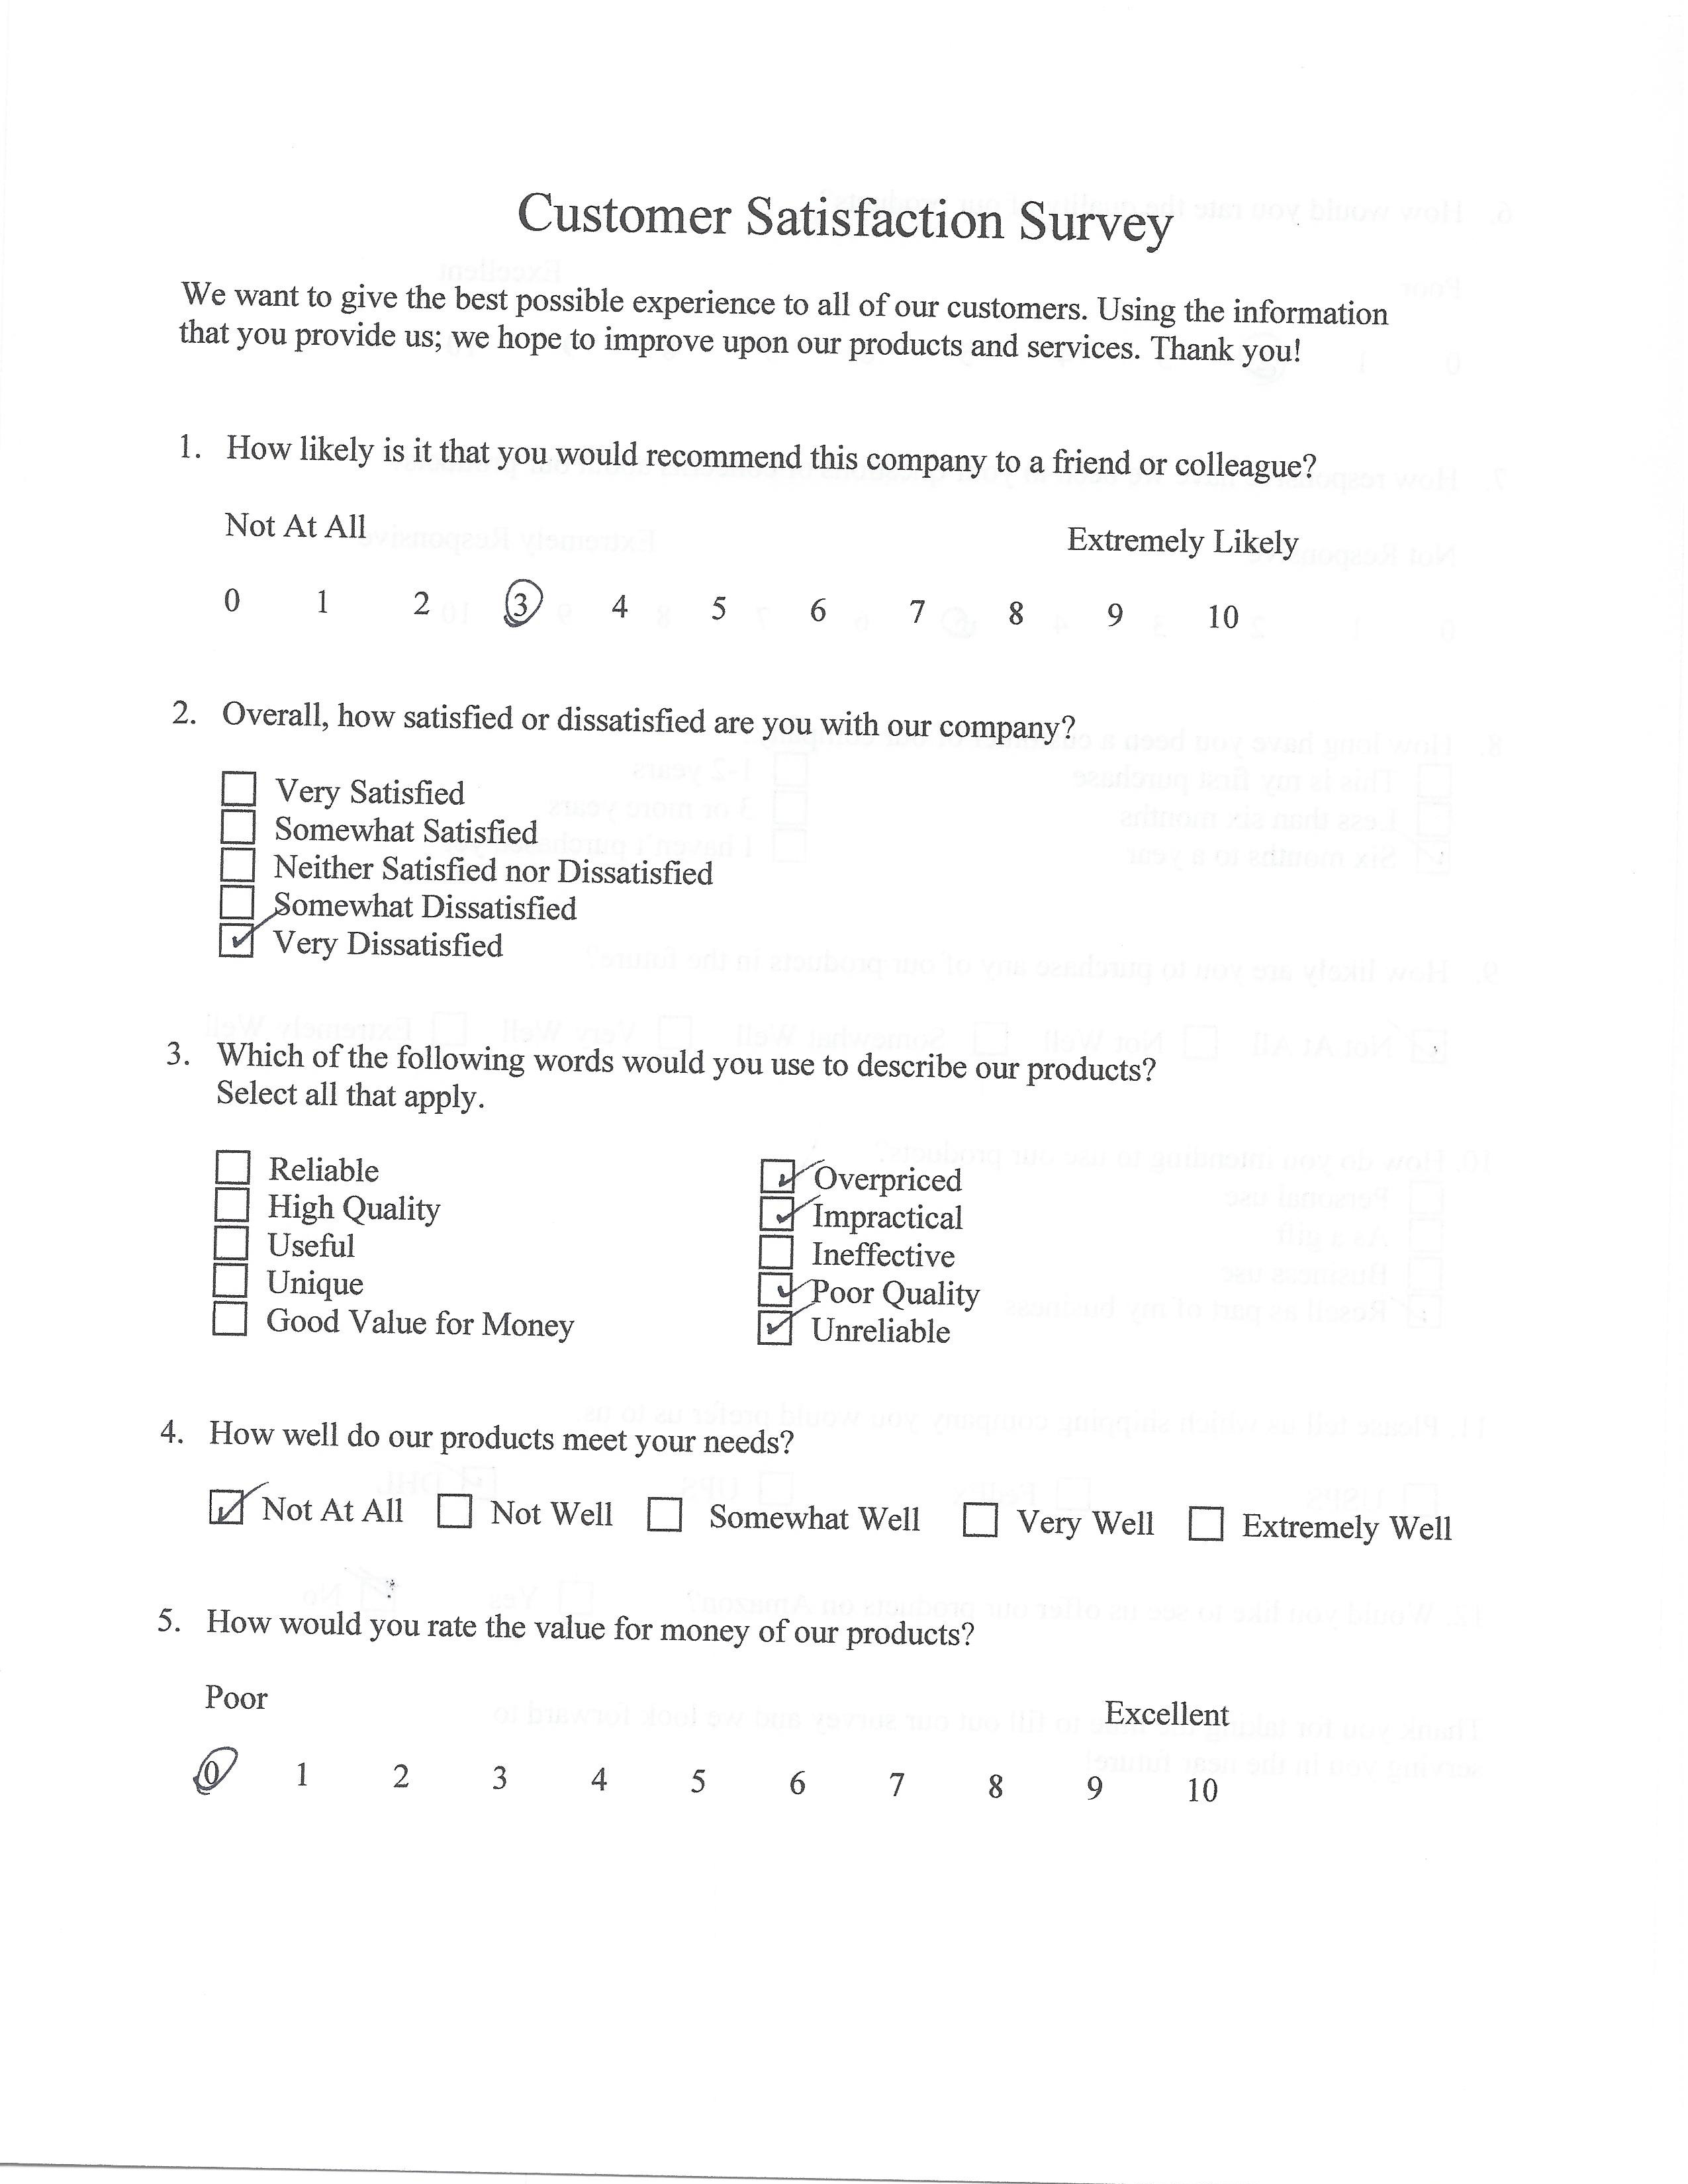

In [14]:
#Look at page1 of the COMPLETED survey
from IPython.display import Image

filled_image1 = base_dir + 'customer_survey_completed1-0.jpg'

Image(filename = filled_image1)

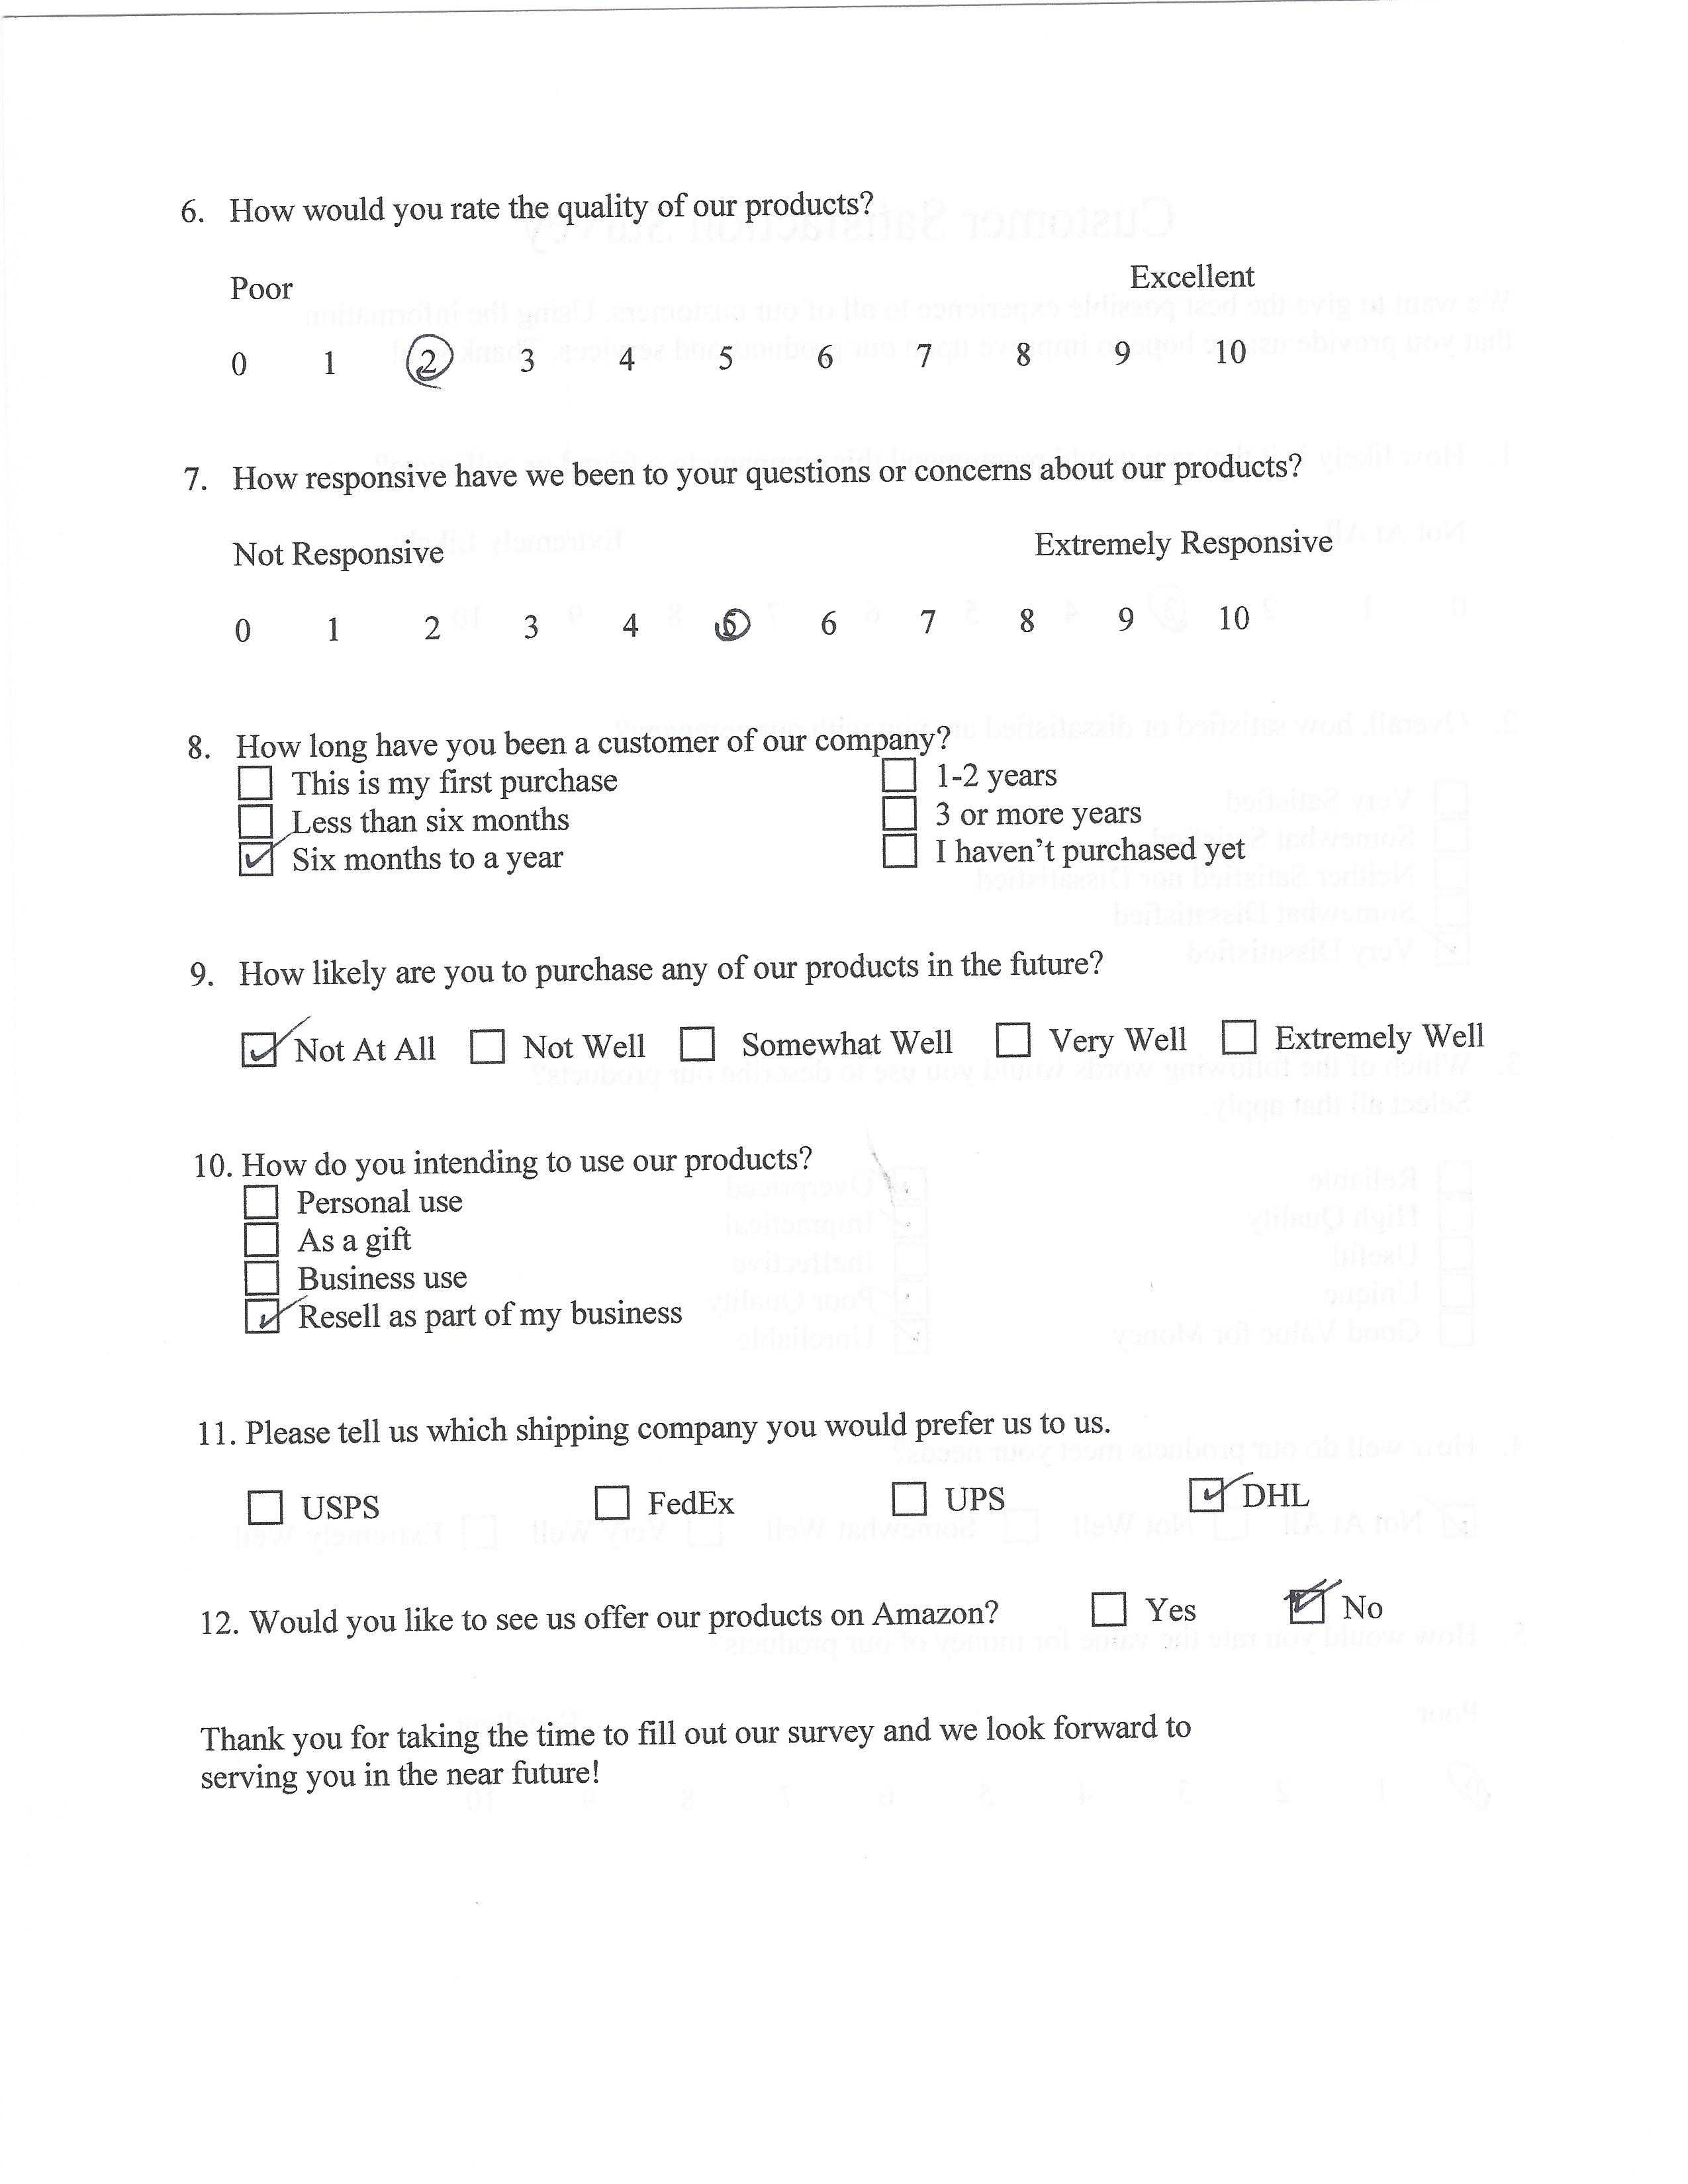

In [15]:
#and then look as page two of the COMPLETED survey
from IPython.display import Image

filled_image2 = base_dir + 'customer_survey_completed1-1.jpg'

Image(filename = filled_image2)

Great. Now let's see what pytesseract can do with a COMPLETED survey and see if we can read the text off the COMPLETED survey as well.

In [16]:
# more imports
from PIL import Image
import pytesseract

# read and store the image
filled_text = pytesseract.image_to_string(Image.open(filled_image1))

# let's see what we have
filled_text

'Customer Satisfaction Survey\n\nWe want to give the best possible experience to all of our customers. Using the information\nthat you provide us; we hope to improve upon our products and services. Thank you!\n\n1. How likely is it that you would recommend this company to a friend or colleague?\nNot At All Extremely Likely\n\nOo 1 2 @ 4 5 6 7 8g 9 4\n\n2. Overall, how satisfied or dissatisfied are you with our company?\n\n[_] Very Satisfied\nSomewhat Satisfied\n[_] Neither Satisfied nor Dissatisfied\nomewhat Dissatisfied\nVery Dissatisfied\n\n3. Which of the following words would you use to describe our products?\nSelect all that apply.\n\n[] Reliable [4+ Overpriced\n[_] High Quality [+ Impractical\n[] Useful [_] Ineffective\n[| Unique [ +Poor Quality\nLJ Good Value for Money [71 Unreliable\n\n4. How well do our products meet your needs?\n\n[A Not At All [] Not Well [1] Somewhat Well [J Very Well [1] Extremely Well\n\n5. How would you rate the value for money of our products?\nPoor Exc

#### Determining Respondents Inputs
Off the bat here is an overview of the responces for question 1 from the BLANK survey in comparison to the COMPLETED survey:

    BLANK Customer Survey: 
        Q1: Not At All Extremely Likely: 0 1 2 3 4 5 6 7 8 8 10

    COMPLETED Customer Survey:
        Q1: Not At All Extremely Likely: 0 1 2 @ 4 5 6 7 8 8 10
    
Notice how '3' within the response line is now '@' for the COMPLETED survey.

In [17]:
#Here we look at the entire text output from tesseract from both BLANK and COMPLETED Surveys for page 1. 

X = {blank_text}
Y = {filled_text}

print("Q1blank Survey is:",X.difference(Y))
print("Q1filled Survey is:",Y.difference(X))

Q1blank Survey is: {'Customer Satisfaction Survey\n\nWe want to give the best possible experience to all of our customers. Using the information\nthat you provide us; we hope to improve upon our products and services. Thank you!\n\n1. How likely is it that you would recommend this company to a friend or colleague?\nNot At All Extremely Likely\n\n0 1 2 3 4 5 6 7 8 9 10\n\n2. Overall, how satisfied or dissatisfied are you with our company?\n\n[-] Very Satisfied\n\n[_] Somewhat Satisfied\n\n[_] Neither Satisfied nor Dissatisfied\n[-] Somewhat Dissatisfied\n\n[_] Very Dissatisfied\n\n3. Which of the following words would you use to describe our products?\nSelect all that apply.\n\n[| Reliable [_] Overpriced\n[_] High Quality [_] Impractical\n["] Useful [] Ineffective\n[ ] Unique [-] Poor Quality\n[_] Good Value for Money [-] Unreliable\n\n4. How well do our products meet your needs?\n\n[-] Not At All [-] Not Well [-] Somewhat Well [ ] Very Well [_] Extremely Well\n\n5. How would you rate t

As we can see, there is a significant amount of different outputs from tesseract upon reading the responses in the COMPLETED survey. We will use the "book-start/book-end" method used in the FTE to extract these differences before we go on to create a function to conduct this on other questions.

In [18]:
#Establish the begining positional bookends for question 1 overall
q1_text = "How likely is it that you would recommend this company to a friend or colleague?"

#Establish the begining positional bookends for Not At All Extremely Likely within question 1
q1_NotOrLikely = "Not At All Extremely Likely"  

#Establish the ending positional bookends for question 1 overall
q1_text2 = "\n\n2."

Recall, that from the Wk3 FTE, they didn't need ending bookends since they know that "Responsiveness:" is at the end of question5 and question 5 is at the end of our text strings.<br>

<b>NOTE:</B>
<br>In the above code, we added the ending positional bookend to the overall question 1. This identifies when the question and response values end within the document that tesseract read.

In [22]:
#Find the character position for the start of question 1 in BLANK survey
q1_begin_b = blank_text.find(q1_text)
q1_end_b = blank_text.find(q1_text2)

#Retreive the question 5 part of the string
#Substring format:: new_string = old_string[start:end]
q1_text_blank = blank_text[q1_begin_b:q1_end_b]
q1_text_blank

'How likely is it that you would recommend this company to a friend or colleague?\nNot At All Extremely Likely\n\n0 1 2 3 4 5 6 7 8 9 10'

In [23]:
#Find the character position for the start of Not At All Extremely Likely within question 1 in BLANK survey
q1_NotOrLikely_b = q1_text_blank.find(q1_NotOrLikely)

#Retreive the Not At All Extremely Likely part of the string in BLANK survey
q1_NotOrLikely_blank = q1_text_blank[q1_NotOrLikely_b:]
q1_NotOrLikely_blank

'Not At All Extremely Likely\n\n0 1 2 3 4 5 6 7 8 9 10'

Now, gather the same text substring from the filled_text block for the COMPLETED survey. The process is the same, but with a different input.

In [24]:
#Isolate question 1 in the filled_text in COMPLETED survey
q1_begin_f = filled_text.find(q1_text)
q1_end_f = filled_text.find(q1_text2)
q1_text_filled = filled_text[q1_begin_f:q1_end_f]

#Isolate the Not At All Extremely Likely part of question 1 in COMPLETED survey
q1_NotOrLikely_f = q1_text_filled.find(q1_NotOrLikely)
q1_NotOrLikely_filled = q1_text_filled[q1_NotOrLikely_f:]
q1_NotOrLikely_filled

'Not At All Extremely Likely\n\nOo 1 2 @ 4 5 6 7 8g 9 4'

First, determine what the two strings have in common, using set() and intersection() to find what the two strings have in common.

In [25]:
#Determine what's common between the two strings
res = set(q1_NotOrLikely_blank).intersection(q1_NotOrLikely_filled)
res

{'\n',
 ' ',
 '1',
 '2',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'E',
 'L',
 'N',
 'e',
 'i',
 'k',
 'l',
 'm',
 'o',
 'r',
 't',
 'x',
 'y'}

Secondly, remove the commonalities from the blank_text substring using the join() and create a new string with by adding the characters from the blank substring that are not in the common set.

In [26]:
#Determine what the user marked as their input based on the NOT common values.
marked_value = ''.join(i for i in q1_NotOrLikely_blank if not i in res) 
marked_value

'030'

In [27]:
#Here we look at the text output from tesseract from both BLANK and COMPLETED Surveys for page 1. 

X = {q1_NotOrLikely_blank}
Y = {q1_NotOrLikely_filled}

print("Q1blank is:",X.difference(Y))
print("Q1filled is:",Y.difference(X))

Q1blank is: {'Not At All Extremely Likely\n\n0 1 2 3 4 5 6 7 8 9 10'}
Q1filled is: {'Not At All Extremely Likely\n\nOo 1 2 @ 4 5 6 7 8g 9 4'}


The above "book-start/book-end" method used in the FTE, didn't exactly worked as we would have liked.<br>
Just outputting the two responses show the following differences:<br>
(0, Oo)<br>
(3, @)<br>
(8, 8g)<br>
(10, 4)<br>

We can make a valid assumption that the value <b>3</b> was circled in the <u>COMPLETED</u> customer Survey.<br>
This is because the value 3 should also exist in the COMPLETED Customer Survey. The value 3 shouldn't be a missing value.<br>

<br> Make sense, right.

<br>In tesseract, 030 translated to 3 being the "disrupted" value that was read in the Completed Survey in comparison to the BLANK Customer survey.<br>

However, somehow 10 was interpreted as 4??? That was odd...And yet, it still didn't output in the about marked_value output for NOT common values because 4 already exsisted in the list.<br>

For no reason, I am curious what would output if we ran the COMPLETED customer survey against the BLANK survey to see what values the COMPELTED customer survey had in comparison to the BLANK survey. <br>
<br> Let's test this out with a marked value for the COMPLETED customer sruvey.

In [28]:
#Determine what the user marked as their input. 
#Here we will output what is different from the COMPLETED Customer Survey in comparison to the BLANK survey.
marked_value1 = ''.join(i for i in q1_NotOrLikely_filled if not i in res) 
marked_value1

'O@g'

In [34]:
# Let's compare the difference found between both the BLANK
X = {marked_value}
Y = {marked_value1}

print("Blank survey differences compared to completed survey:",X.difference(Y))
print("Completed survey differences compared to completed survey:",Y.difference(X))

Blank survey differences compared to completed survey: {'030'}
Completed survey differences compared to completed survey: {'O@g'}


Okay...moving on because I need to think about this some more.....<br>
Maybe I am overthinking as usual, but neither of the values "O@g" from the COMPLETED survey should be found in the BLANK survey.<br> Therefore, the method to output the differences in the BLANK survey may prove to be more effective since the number 3 should be a value listed in the either response outputs. This is an indication as to why it was "disrupted" by the circling of the 3 being read as the @ value in the COMPLETED survey.

<b>Moving on...</b>

For our future use, let's create two functions:
1. To merge PDF files together.
2. To Split PDF files together.<br>
<br>
Alright here we got....

In [42]:
#Merging PDF fiels together in python.

from PyPDF2 import PdfFileReader, PdfFileWriter

def merge_pdfs(paths, output):
    pdf_writer = PdfFileWriter()

    for path in paths:
        pdf_reader = PdfFileReader(path)
        for page in range(pdf_reader.getNumPages()):
            # Add each page to the writer object
            pdf_writer.addPage(pdf_reader.getPage(page))

    # Write out the merged PDF
    with open(output, 'wb') as out:
        pdf_writer.write(out)

if __name__ == '__main__':
    paths = ['assign3_data/CustomerSurvey_blank.pdf', 'assign3_data/customer_survey_completed1.pdf']
    merge_pdfs(paths, output='assign3_data/csmerged.pdf')

In [43]:
#Let's confirm that the merged file exists:
!dir /S csmerged*

 Volume in drive C is Windows
 Volume Serial Number is 34A7-90A0

 Directory of C:\Users\Stacey\Desktop\RU\MSDE621\WeeklyContent\assign3_data

11/22/2019  01:21 PM         1,531,619 csmerged.pdf
               1 File(s)      1,531,619 bytes

     Total Files Listed:
               1 File(s)      1,531,619 bytes
               0 Dir(s)  13,727,531,008 bytes free


In [44]:
# pdf_splitting.py

from PyPDF2 import PdfFileReader, PdfFileWriter

def split(path, name_of_split):
    pdf = PdfFileReader(path)
    for page in range(pdf.getNumPages()):
        pdf_writer = PdfFileWriter()
        pdf_writer.addPage(pdf.getPage(page))

        output = f'{name_of_split}{page}.pdf'
        with open(output, 'wb') as output_pdf:
            pdf_writer.write(output_pdf)

if __name__ == '__main__':
    path = 'assign3_data/csmerged.pdf'
    split(path, 'assign3_data/csmerged_page')

In [45]:
#Let's confirm that the merged file has been split into seperate pages:
!dir /S csmerged_*

 Volume in drive C is Windows
 Volume Serial Number is 34A7-90A0

 Directory of C:\Users\Stacey\Desktop\RU\MSDE621\WeeklyContent\assign3_data

11/22/2019  01:21 PM           424,809 csmerged_page0.pdf
11/22/2019  01:21 PM           328,381 csmerged_page1.pdf
11/22/2019  01:21 PM           443,513 csmerged_page2.pdf
11/22/2019  01:21 PM           335,820 csmerged_page3.pdf
               4 File(s)      1,532,523 bytes

     Total Files Listed:
               4 File(s)      1,532,523 bytes
               0 Dir(s)  13,725,990,912 bytes free


For my own purpose, I don't want to keep scrolling back up. So, I want to look back at the output from tesseract on page 1 for the BLANK and COMPLETED Customer Survey again:

In [46]:
#Here we look at the entire text output from tesseract from both BLANK and COMPLETED Surveys for page 1. 

X = {blank_text}
Y = {filled_text}

print("Q1blank Survey is:",X.difference(Y))
print("Q1filled Survey is:",Y.difference(X))

Q1blank Survey is: {'Customer Satisfaction Survey\n\nWe want to give the best possible experience to all of our customers. Using the information\nthat you provide us; we hope to improve upon our products and services. Thank you!\n\n1. How likely is it that you would recommend this company to a friend or colleague?\nNot At All Extremely Likely\n\n0 1 2 3 4 5 6 7 8 9 10\n\n2. Overall, how satisfied or dissatisfied are you with our company?\n\n[-] Very Satisfied\n\n[_] Somewhat Satisfied\n\n[_] Neither Satisfied nor Dissatisfied\n[-] Somewhat Dissatisfied\n\n[_] Very Dissatisfied\n\n3. Which of the following words would you use to describe our products?\nSelect all that apply.\n\n[| Reliable [_] Overpriced\n[_] High Quality [_] Impractical\n["] Useful [] Ineffective\n[ ] Unique [-] Poor Quality\n[_] Good Value for Money [-] Unreliable\n\n4. How well do our products meet your needs?\n\n[-] Not At All [-] Not Well [-] Somewhat Well [ ] Very Well [_] Extremely Well\n\n5. How would you rate t

In [47]:
#Check the type of the filled_text
type(filled_text)

str

In [50]:
filled_text = []
for line in infile:
        filled_text.append(line)

filled_text

['C',
 'u',
 's',
 't',
 'o',
 'm',
 'e',
 'r',
 'S',
 'u',
 'r',
 'v',
 'e',
 'y',
 '_',
 'b',
 'l',
 'a',
 'n',
 'k',
 '.',
 'p',
 'd',
 'f']

Okay that didn't work as I wanted. Moving on again...

Before we go on any further, let's take a look at this output and see how we can create a function to output the responses in the BLANK Customer Survey and the COMPLETED Customer Survey. Then request to output the differences for each response for each question. Assuming we output the commonalities first to extract the differences for each response for each question.<br>

<br><b>Sounds like a TON of code....</b> so before we get started with an attempt.

SEVERAL things to consider based on the output above comparing page 1 for both BLANK and COMPLETED Customer Survey:
* Each question begins with "\n", "question number (i.e. 1)", (period) ".", "Question within that line" followed by the final "\n" before the nest line is indicated for the response sentence.
* Each question ends with the "response valuee or check box response" followed by the final "\n" line break before the next qurstion and closely followed by anoth "\n" and the following "question number (i.e. 2)".


<br>That sounds simple enough...BUT not really.<br>
The responses or "disrupted" values as we seen in question 1 already proved to show us the significant differences in how tesseract read the response values and the "disrupted" value for the BLANK and COMPLETED Customer Survey.

Remember the output differences in how tesserect read the following responses:<br>
   Blank  -   0   3   8    10<br>
   Filled -  Oo   @   8g    4<br>

In [52]:
X = {marked_value}
Y = {marked_value1}

print("Blank survey differences compared to completed survey:",X.difference(Y))
print("Completed survey differences compared to completed survey:",Y.difference(X))

Blank survey differences compared to completed survey: {'030'}
Completed survey differences compared to completed survey: {'O@g'}


<b>Assumption</b><br>
To be honest, I hate assumptions because I hate not having factual data to support my arguement. For me, assuming something or anything is just plain bad. We can't assume that what we assume is FACT. That is why assumptions can be poor in making judgements.<br>
<br>
<b>BUT</b> let's ASSUME, we can read in each question perfectly based on the experience we had with Tesseract reading in the questions for both the BLANK and COMPLETED Customer Survey.<br>
<br>
<b>NOW</b> let's ASSUME, every response was read in <u>perfectly</u>. This is a bad assumption because we have already been proved wrong that the differences in the response outputs are different even if 3 was the value we came to the conclusion as the "disrupted" value...Even if we can NOT ASSUME this will be accurate for each and every response in each and every COMPLETED Customer Survey, let's just pretend that each response is read <b><u>perfectly</b></u>.<br>
<br>
<b>OKAY</b> So let's say we try to read in other notations such as the example of invented values, or say a customer scratched out an answer and changed there minds, or let's say the customer wrote something in the margins of the survey. <br>
<br>Or let's just say some customers use an X instead of a circle to indicate the value of their response, or if the customer uses a check mark or a simple diagnal to indicate the value they have selected.<br>

<br>Each of the various potential options of how a person answers each question can be extremely varied and different. <br>
<br>Worse of all, let's say we get a distracted customer who makes a mistake on their marked response and marks another response.<br>

Okay, I have rambled on enough about the possible concerns, so let's try to split out the LARGE survye and work at how question 1 can be extracted based on our previous code and testing...

In [53]:
#USE this code to break up the LARGE Customer Survey file into 4 chunks (100 pages each) into seperagte smaller PDF files.
#This will allow us to work with a smaller Customer Survey response size.

from pdfrw import PdfReader, PdfWriter
pages = PdfReader('assign3_data/CustomerSurvey_large.pdf').pages
parts = [(1,99),(99,199),(199,299),(299,401)]
for part in parts:
    outdata = PdfWriter(f'assign3_data/LargeSurvey_pages_{part[0]}_{part[1]}.pdf')
    for pagenum in range(*part):
        outdata.addpage(pages[pagenum-1])
    outdata.write()

In [54]:
#Confirm the 4 seperate fields exist of the Large Survey.
!dir /S LargeSurvey*

 Volume in drive C is Windows
 Volume Serial Number is 34A7-90A0

 Directory of C:\Users\Stacey\Desktop\RU\MSDE621\WeeklyContent\assign3_data

11/22/2019  01:28 PM        38,913,439 LargeSurvey_pages_199_299.pdf
11/22/2019  01:28 PM        38,134,607 LargeSurvey_pages_1_99.pdf
11/22/2019  01:28 PM        39,728,614 LargeSurvey_pages_299_401.pdf
11/22/2019  01:28 PM        38,927,906 LargeSurvey_pages_99_199.pdf
               4 File(s)    155,704,566 bytes

     Total Files Listed:
               4 File(s)    155,704,566 bytes
               0 Dir(s)  13,566,824,448 bytes free


<b>Convert the LARGE Customer Survey PDF file to JPEG</b><br>
We must do this in sections as we just broke down the LARGE Customer Survey into 100 page chucnks int he previous code.

In [55]:
# import Wand and Image as Img. 
from wand.image import Image as Img

# variables are so much eaiser to work with
infile = 'LargeSurvey_pages_1_99.pdf'
outfile = 'LargeSurvey_pages_1_99.jpg'

base_dir = 'assign3_data/' 

blank_infile = base_dir + infile    
blank_outfile = base_dir + outfile 

# actually convert the PDF into a JPEG
with Img(filename = blank_infile, resolution=300) as img:
    img.compression_quality = 99
    img.save(filename = blank_outfile)

In [56]:
#Verify that the JPEG file exists of the Large Survey for pages 1-99.
!dir /S LargeSurvey*

 Volume in drive C is Windows
 Volume Serial Number is 34A7-90A0

 Directory of C:\Users\Stacey\Desktop\RU\MSDE621\WeeklyContent\assign3_data

11/22/2019  01:28 PM        38,913,439 LargeSurvey_pages_199_299.pdf
11/22/2019  01:35 PM           552,629 LargeSurvey_pages_1_99-0.jpg
11/22/2019  01:35 PM           482,458 LargeSurvey_pages_1_99-1.jpg
11/22/2019  01:35 PM           554,535 LargeSurvey_pages_1_99-10.jpg
11/22/2019  01:35 PM           489,223 LargeSurvey_pages_1_99-11.jpg
11/22/2019  01:35 PM           551,507 LargeSurvey_pages_1_99-12.jpg
11/22/2019  01:35 PM           483,085 LargeSurvey_pages_1_99-13.jpg
11/22/2019  01:35 PM           555,739 LargeSurvey_pages_1_99-14.jpg
11/22/2019  01:35 PM           487,115 LargeSurvey_pages_1_99-15.jpg
11/22/2019  01:35 PM           555,630 LargeSurvey_pages_1_99-16.jpg
11/22/2019  01:35 PM           485,630 LargeSurvey_pages_1_99-17.jpg
11/22/2019  01:35 PM           550,126 LargeSurvey_pages_1_99-18.jpg
11/22/2019  01:35 PM           

As we can see, my intentions have led us down a differnt path. Where and how to go from here to compare the BLANK Customer Survey to each page within this LARGE survey has far exceeded my abilities. I will leave it at this....

In [ ]:
#The following was my initial intent to save the text from the tesseract read to CSV
#but this example was using tabula from JSON to CSV...


# converting to Excel
tabula.convert_into(pdf_file, "data_wk3/offense.xlsx", output_format="xlsx")

# converting to csv
tabula.convert_into(pdf_file, "data_wk3/offense.csv", output_format="csv")

In [1]:
#Let's close the original pdf file object way back from the first cell of this Jupyter Notebook. 
pdfFileObj.close() 

NameError: name 'pdfFileObj' is not defined

<b>Final Thoughts</b><br>
Okay, this Jupyter Notebook didn't end up as expected. The goal of this assignment only led to this small extent of the purpose of this assignment.<br>
However, we learned the hard way, the very hard way that dealing with PDF files and extracting data proves to be extremely painful. It's difficult, so if at all possible take the suggestion from Week3 FTE that we should <b>"Avoid using PDFs!"</b>